<a href="https://colab.research.google.com/github/kaanbaycan/IE-423-Forecasting-Tasks/blob/main/IE_423_Task_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Mount to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Connect to the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IE-423/final_data.csv')

In [ ]:
#Quick look at the dataset
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 



*   Our target column is *current value* which is numeric and continous
*   We have 19 features apart from the name, player and current value columns



# EDA

## Univariate and Bivariate Stats

In [ ]:
#Hence we can drop the name or player column since both correspond to same information
df = df.drop(['player'], axis=1)

In [ ]:
#We start with basic statistics for both numeric and categorical data
def unistats(dataframe,sorted="Missing"):
    """"
    Takes dataframe and sorted as parameter
    Returns count, missing, unique, dtype, mode and other stats"""
    pd.set_option("display.max_rows",100)
    pd.set_option("display.max_columns",100)
    output_df = pd.DataFrame(columns = ["Count","Missing","Unique", "Dtype", "Mode", "Mean", "Min", "25%", "Median", "75%", "Max", "Std", "Skew", "Kurt"])

    for col in dataframe:
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            output_df.loc[col] =[dataframe[col].count() ,dataframe[col].isnull().sum() ,dataframe[col].nunique() ,dataframe[col].dtype ,dataframe[col].mode().values[0], dataframe[col].mean(), dataframe[col].min(), dataframe[col].quantile(0.25), dataframe[col].median(), dataframe[col].quantile(0.75),dataframe[col].max(), dataframe[col].std(), dataframe[col].skew(),dataframe[col].kurt()]
        else:
            output_df.loc[col] =[dataframe[col].count() ,dataframe[col].isnull().sum() ,dataframe[col].nunique() ,dataframe[col].dtype , "-", "-", "-","-", "-", "-","-", "-", "-","-"]


    return output_df.sort_values(by = ["Dtype",sorted])
unistats(df)

,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
appearance,10754,0,108,int64,0,36.407011,0,12.0,35.0,59.0,107,26.526541,0.287559,-1.097961
minutes played,10754,0,5036,int64,0,2470.789381,0,660.0,2101.5,3968.0,9510,2021.703271,0.631469,-0.507871
days_injured,10754,0,772,int64,0,117.961689,0,0.0,37.0,181.0,2349,175.206827,2.389145,8.948364
games_injured,10754,0,154,int64,0,15.826297,0,0.0,5.0,24.0,339,23.383606,2.347507,9.221563
award,10754,0,46,int64,0,1.960759,0,0.0,1.0,2.0,92,3.743936,6.505613,90.932885
current_value,10754,0,128,int64,1000000,3622970.98754,0,300000.0,800000.0,3000000.0,180000000,9095409.877793,6.453459,63.339432
highest_value,10754,0,156,int64,1000000,6152606.007067,0,450000.0,1500000.0,5000000.0,200000000,13389876.391295,5.069477,37.24447
position_encoded,10754,0,4,int64,2,2.713223,1,2.0,3.0,4.0,4,0.986356,-0.116696,-1.086046
winger,10754,0,2,int64,0,0.307513,0,0.0,0.0,1.0,1,0.461485,0.834359,-1.304087
height,10754,0,47,float64,180.0,181.240353,156.0,176.0,181.240353,186.0,206.0,6.969818,-0.047892,-0.33391




*   We have 18 numeric columns and 3 categorical columns

In [ ]:
#Lets import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#To start visualizing data, lets first see the best features in terms of explainin the variance of target
def correlation(dataframe, target):
    from scipy import stats
    """
    Takes dataframe and target feature as parameter
    Returns the correlation between numeric columns and target"""

    output_dataframe = pd.DataFrame(columns = ["Columns","P-Value","Correlation Coefficient(r)","Absolute r"])
    for col in dataframe.drop(target,axis = 1):
        try:
            if pd.api.types.is_numeric_dtype(dataframe[col]):
                r, p = stats.pearsonr(dataframe[col],dataframe[target])
                output_dataframe.loc[col] = [f"{target}-{col}",round(p,4),r,abs(r)]
            else:
                pass
        except:
            pass

    return output_dataframe.sort_values(by = ["Absolute r"],ascending = False)

correlation(df,"current_value")

,Columns,P-Value,Correlation Coefficient(r),Absolute r
highest_value,current_value-highest_value,0.0000,0.834553,0.834553
minutes played,current_value-minutes played,0.0000,0.420542,0.420542
appearance,current_value-appearance,0.0000,0.419656,0.419656
award,current_value-award,0.0000,0.300454,0.300454
assists,current_value-assists,0.0000,0.137415,0.137415
games_injured,current_value-games_injured,0.0000,0.135654,0.135654
goals,current_value-goals,0.0000,0.121574,0.121574
days_injured,current_value-days_injured,0.0000,0.107686,0.107686
position_encoded,current_value-position_encoded,0.0000,0.085154,0.085154
goals conceded,current_value-goals conceded,0.0000,-0.063529,0.063529




*   Here we can see that the 12 numeric features have p value less than 0.05 hence are significantly related to target column
*   On the other hand 5 features seems not very related to target




<ipython-input-10-126568bd8bd8>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<Axes: ylabel='highest_value'>

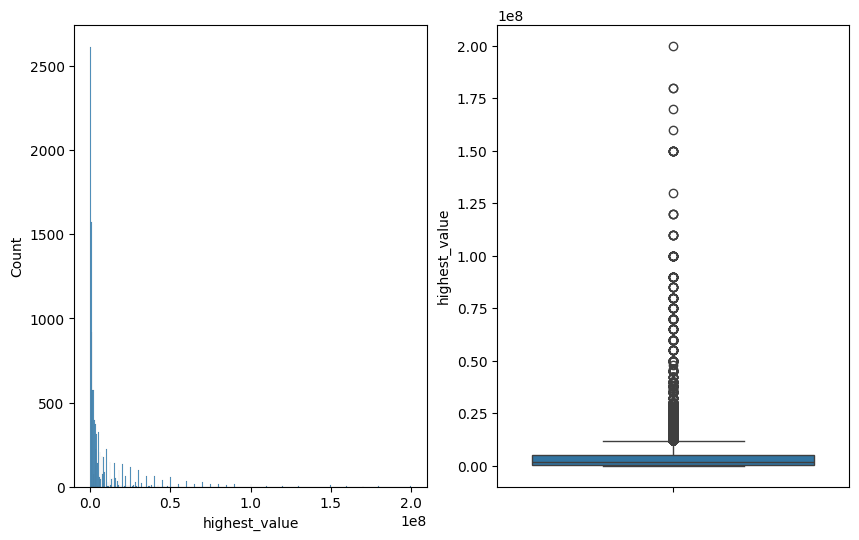

In [ ]:
# Lets start with the highest value feature
plt.subplots(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df["highest_value"])
plt.subplot(1,2,2)
sns.boxplot(df["highest_value"])



*   This is a highly skewed feature as can be seen from the unistats above
*   We also observe many outliers above the 4th quartile
*   There are also 0 highest values, which seem not possible to me. Lets dive deeper


In [ ]:
df[df["highest_value"] == 0]

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
406,Newcastle United,Sven Botman,Defender Centre-Back,195.000000,23.000000,76,0.041159,0.013720,0.123476,0.0,0.0,0.0,0.0,6560,118,19,4,0,0,2,0
407,Newcastle United,Fabian Schär,Defender Centre-Back,186.000000,31.000000,67,0.045678,0.076129,0.182710,0.0,0.0,0.0,0.0,5911,285,30,3,0,0,2,0
408,Newcastle United,Jamaal Lascelles,Defender Centre-Back,188.000000,29.000000,38,0.068992,0.000000,0.310464,0.0,0.0,0.0,0.0,2609,418,57,2,0,0,2,0
409,Newcastle United,Matt Targett,Defender Left-Back,183.000000,27.000000,54,0.023747,0.023747,0.094987,0.0,0.0,0.0,0.0,3790,380,66,0,0,0,2,1
666,FC Augsburg,Mert Kömür,midfield-AttackingMidfield,183.000000,17.000000,46,0.268876,0.293319,0.073330,0.0,0.0,0.0,0.0,3682,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,Brisbane Roar,Zahi Addis,Defender Left-Back,181.240353,19.000000,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2,1
10586,Brisbane Roar,James Murphy,midfield,181.240353,17.000000,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,3,0
10587,Brisbane Roar,Riley Gill,midfield,181.240353,26.041903,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,0,0,0,0,3,0
10686,Sydney FC,Corey Hollman,midfield-DefensiveMidfield,181.240353,19.000000,1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3,0,0,0,0,0,3,0


In [ ]:
# Fabian Schar has current value 10M euro, even played 3 match at the Euro's currently. Hence there is obviously a mistake. I will drop the rows with 0 highest value.
df = df[df["highest_value"] != 0]
# We lost 125 data points

<ipython-input-13-2d4217f4369e>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<Axes: ylabel='highest_value'>

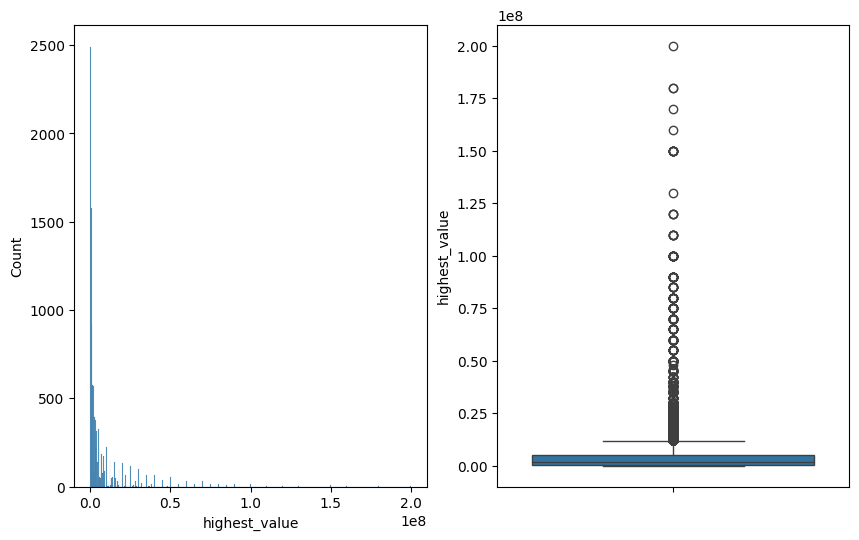

In [ ]:
plt.subplots(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df["highest_value"])
plt.subplot(1,2,2)
sns.boxplot(df["highest_value"])

In [ ]:
#Lets try some transformations cus of the skewness
df["highest_value_sqrt"] = np.sqrt(df["highest_value"])
df["highest_value_log"] = np.log(df["highest_value"])
df["highest_value_fourier"] = np.sin(df["highest_value"])

In [ ]:
plt.subplots(figsize=(10,6))
plt.subplot(1,3,1)
sns.histplot(df["highest_value_fourier"])
plt.subplot(1,3,2)
sns.histplot(df["highest_value_sqrt"])
plt.subplot(1,3,3)
sns.histplot(df["highest_value_log"])

<ipython-input-217-37421db5f0a3>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


<Axes: xlabel='highest_value_log', ylabel='Count'>

In [ ]:
correlation(df,"current_value")

,Columns,P-Value,Correlation Coefficient(r),Absolute r
highest_value,current_value-highest_value,0.0000,0.834215,0.834215
highest_value_sqrt,current_value-highest_value_sqrt,0.0000,0.768673,0.768673
highest_value_log,current_value-highest_value_log,0.0000,0.548614,0.548614
minutes played,current_value-minutes played,0.0000,0.419732,0.419732
appearance,current_value-appearance,0.0000,0.418747,0.418747
award,current_value-award,0.0000,0.299026,0.299026
assists,current_value-assists,0.0000,0.137627,0.137627
games_injured,current_value-games_injured,0.0000,0.133488,0.133488
goals,current_value-goals,0.0000,0.121443,0.121443
days_injured,current_value-days_injured,0.0000,0.105399,0.105399


Although, it seems like the sqrt transformed feature looks more normal the r2 has dropped. But I will later compare the evaluation scores of models with different features.

<ipython-input-16-287737430463>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<Axes: ylabel='minutes played'>

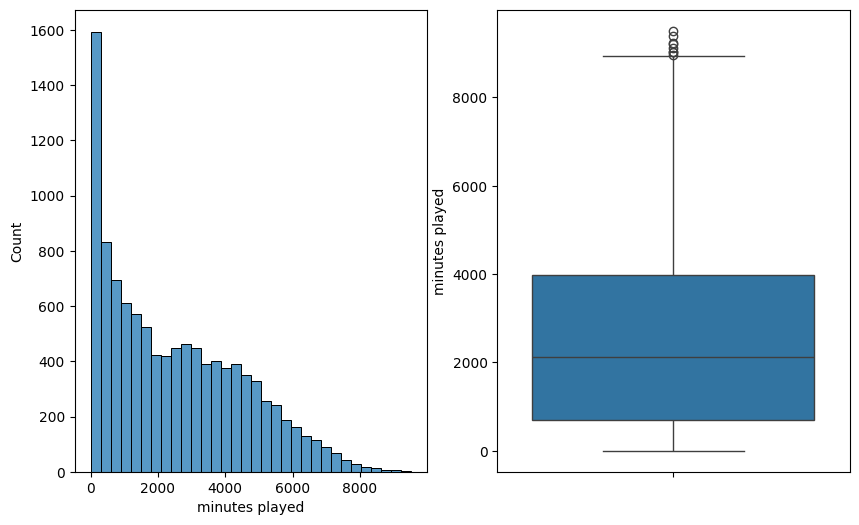

In [ ]:
#Lets now look at the minutes played
plt.subplots(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df["minutes played"])
plt.subplot(1,2,2)
sns.boxplot(df["minutes played"])

In [ ]:
df["minutes played"].sort_values()

8298        0
10437       0
8619        0
8620        0
10596       0
         ... 
372      9120
4279     9208
1504     9240
0        9390
1550     9510
Name: minutes played, Length: 10629, dtype: int64

How can I player play 0 mins ?

In [ ]:
df[df["minutes played"] == 0]

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,highest_value_sqrt,highest_value_log,highest_value_fourier
189,Everton FC,Andy Lonergan,Goalkeeper,193.000000,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,255,32,3,200000,700000,1,0,836.660027,13.458836,0.247690
322,AFC Bournemouth,Darren Randolph,Goalkeeper,187.000000,36.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,103,18,1,500000,4500000,1,0,2121.320344,15.319588,0.999269
349,Brentford FC,Matthew Cox,Goalkeeper,183.000000,20.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,500000,500000,1,0,707.106781,13.122363,0.177831
565,VfL Wolfsburg,Niklas Klinger,Goalkeeper,187.000000,27.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,132,24,3,100000,100000,1,0,316.227766,11.512925,0.035749
620,1.FC Union Berlin,Jakob Busk,Goalkeeper,189.000000,29.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,134,22,2,250000,800000,1,0,894.427191,13.592367,-0.282166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10650,Melbourne City FC,James Nieuwenhuizen,Goalkeeper,181.240353,19.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,25000,25000,1,0,158.113883,10.126631,-0.713399
10660,Melbourne City FC,Emile Peios,midfield,181.240353,19.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,25000,25000,3,0,158.113883,10.126631,-0.713399
10663,Melbourne City FC,Emin Durakovic,midfield-LeftMidfield,181.240353,17.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,25000,25000,3,1,158.113883,10.126631,-0.713399
10673,Melbourne City FC,Arion Sulemani,Attack Centre-Forward,181.240353,18.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,101,12,0,25000,25000,4,0,158.113883,10.126631,-0.713399


It makes sense for too young and too old players to not play any game. I would like to cluster the age groups hence.

<Axes: xlabel='age', ylabel='Count'>

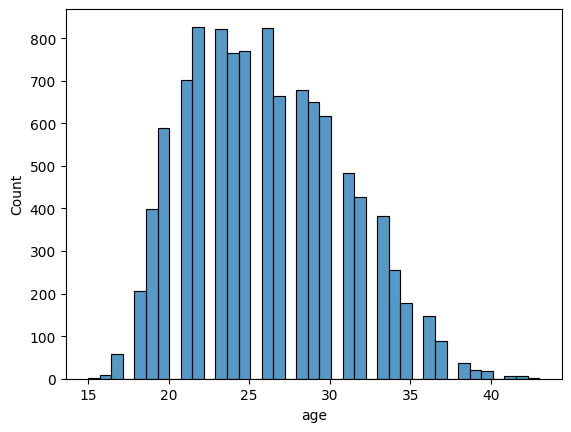

In [ ]:
sns.histplot(df["age"])

<Axes: xlabel='age', ylabel='minutes played'>

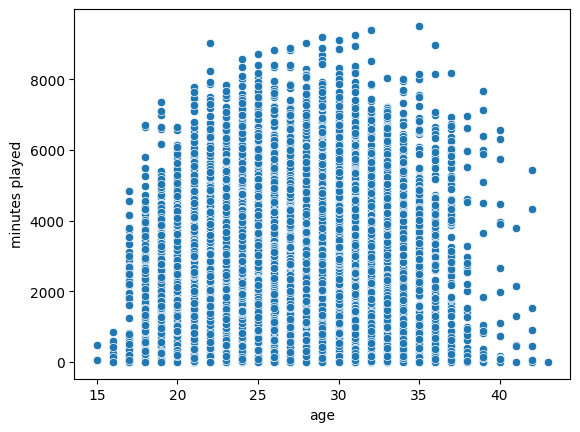

In [ ]:
#lets look at the correlation between age and minutes played
sns.scatterplot(data = df, x = "age", y = "minutes played")

<Axes: xlabel='age', ylabel='current_value'>

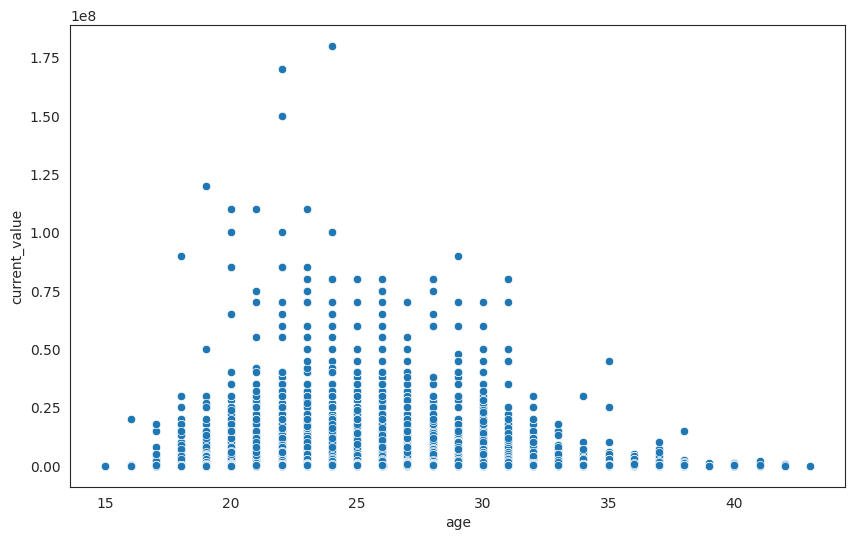

In [ ]:
#lets scatter age vs current value and try to observe clusters
sns.set_style(style="white")
plt.subplots(figsize=(10,6))

sns.scatterplot(data = df, x = "age", y = "current_value")

In [ ]:
#Lets cluster younger than 18 and older than 35 as veterans
df["veteran"] = np.where((df["age"] < 18) | (df["age"] > 35), 1, 0)

<Axes: xlabel='veteran', ylabel='current_value'>

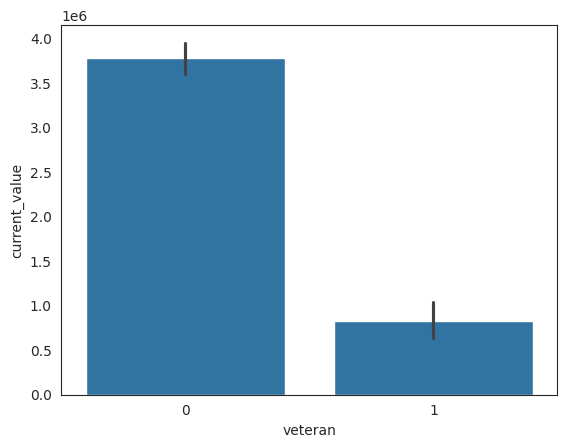

In [ ]:
sns.barplot(data = df, x = "veteran", y = "current_value")

We have a new binary feature: veteran

In [ ]:
#Lets also create a new binary feature for never played players
df["never_played"] = np.where(df["minutes played"] == 0, 1, 0)

<Axes: xlabel='never_played', ylabel='current_value'>

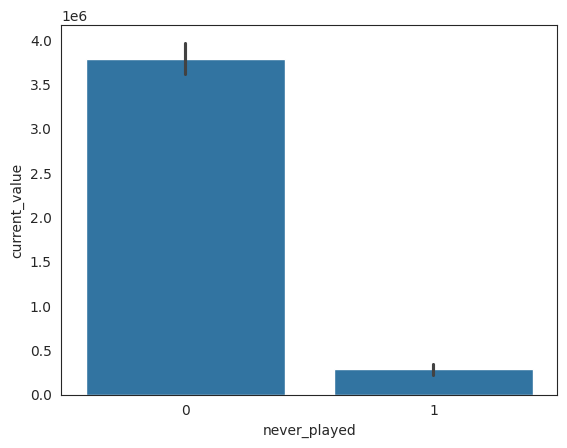

In [ ]:
sns.barplot(data = df, x = "never_played", y = "current_value")

<Axes: xlabel='appearance', ylabel='Count'>

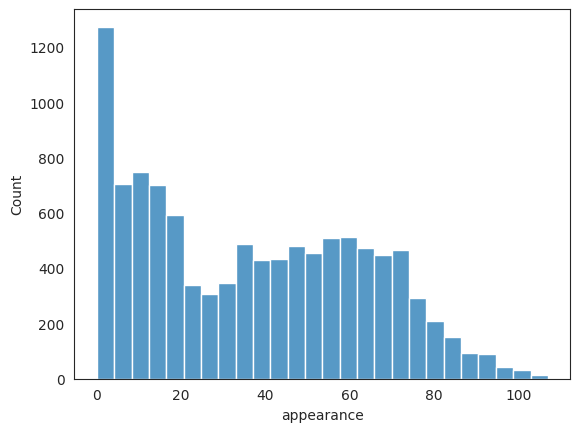

In [ ]:
#Let's move on to appearance
sns.histplot(df["appearance"])

In [ ]:
# I wonder if there is any player who appeared but not take any minutes played,ie, problem with dataset
df[df["appearance"] == 0]["minutes played"].describe()

count    364.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: minutes played, dtype: float64

<Axes: ylabel='award'>

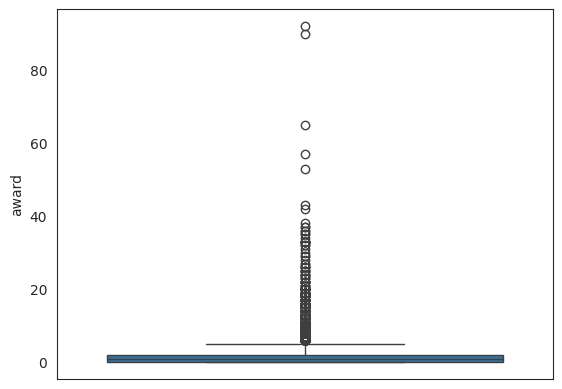

In [ ]:
#since there are 0 values I will not make any transformations to normalize rather move on with next feature award
sns.boxplot(df["award"])

In [ ]:
df[df["award"]==0].count()

team                     4660
name                     4660
position                 4660
height                   4660
age                      4660
appearance               4660
goals                    4660
assists                  4660
yellow cards             4660
second yellow cards      4660
red cards                4660
goals conceded           4660
clean sheets             4660
minutes played           4660
days_injured             4660
games_injured            4660
award                    4660
current_value            4660
highest_value            4660
position_encoded         4660
winger                   4660
highest_value_sqrt       4660
highest_value_log        4660
highest_value_fourier    4660
veteran                  4660
never_played             4660
dtype: int64

So we have 4660 never awarded players among 10629 data points. Which is almost half. Hence we can create a new binary variable.

In [ ]:
df["never_awarded"] = np.where(df["award"] == 0, 1, 0)

<Axes: xlabel='never_awarded', ylabel='current_value'>

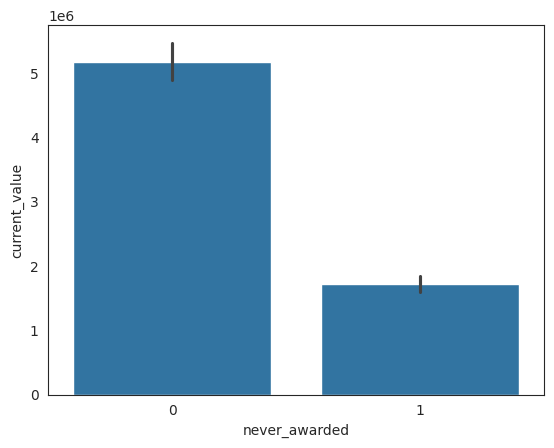

In [ ]:
sns.barplot(data = df, x = "never_awarded", y = "current_value")

<Axes: xlabel='award', ylabel='current_value'>

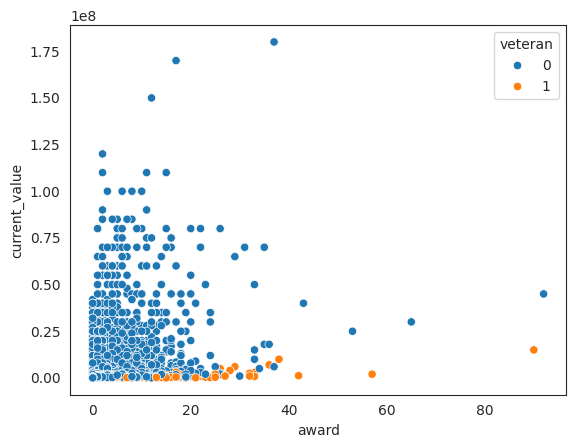

In [ ]:
sns.scatterplot(data = df, x = "award", y = "current_value", hue = "veteran")

Hence we can see that awarded and young players tend to have higher values.
* Lastly, I will look at the positions.

<Axes: xlabel='position', ylabel='Count'>

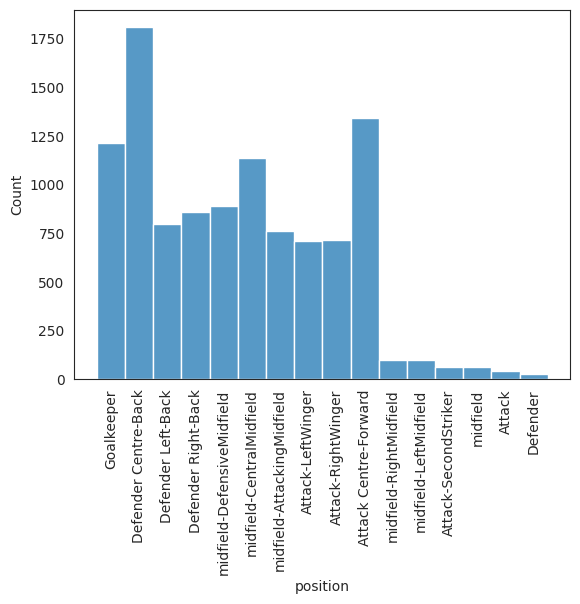

In [ ]:
plt.xticks(rotation=90)
sns.histplot(df["position"])

In [ ]:
#Lets make an anova test to see if this much category is needed
def barplots(dataframe, label, target):
    from scipy import stats
    """
    Takes dataframe, feature and target as parameter
    Applies t-tests for categorical features
    Returns a barpot with t-stat and p values"""

    ttests = []
    string = "Categories  t stat  p value \n "
    if pd.api.types.is_numeric_dtype(dataframe[label]) == False and len(dataframe[label].unique()) <= 20 and len(dataframe[label].unique())>=2:
        e_types = dataframe[label].unique()
        for i, e in enumerate(e_types):
            for i2, e2 in enumerate(e_types):
                if i2 >= i :
                    g1 = dataframe[dataframe[label] == e][target]
                    g2 = dataframe[dataframe[label] == e2][target]
                    t, p = stats.ttest_ind(g1,g2)
                    ttests.append([f"{e} - {e2}", t, p])
                    string += (f"{e} - {e2}: {t:.4f}, {p:.5f} " + " \n ")
                    if p < 0.05:
                        string += "Significant" + "\n"
                    else:
                        string += "Not Significant" + "\n"
        plt.figure()
        plt.figsize=(10,6)
        plt.text(5, 0.1, string, fontsize = 8)
        viz = sns.barplot(data = dataframe, x = label , y = target,)
        viz.set_xticklabels(viz.get_xticklabels(), rotation = 90)
        viz.set(title = f"{target} by {label}")
        plt.show()

<ipython-input-34-20ab45e21a6f>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(), rotation = 90)


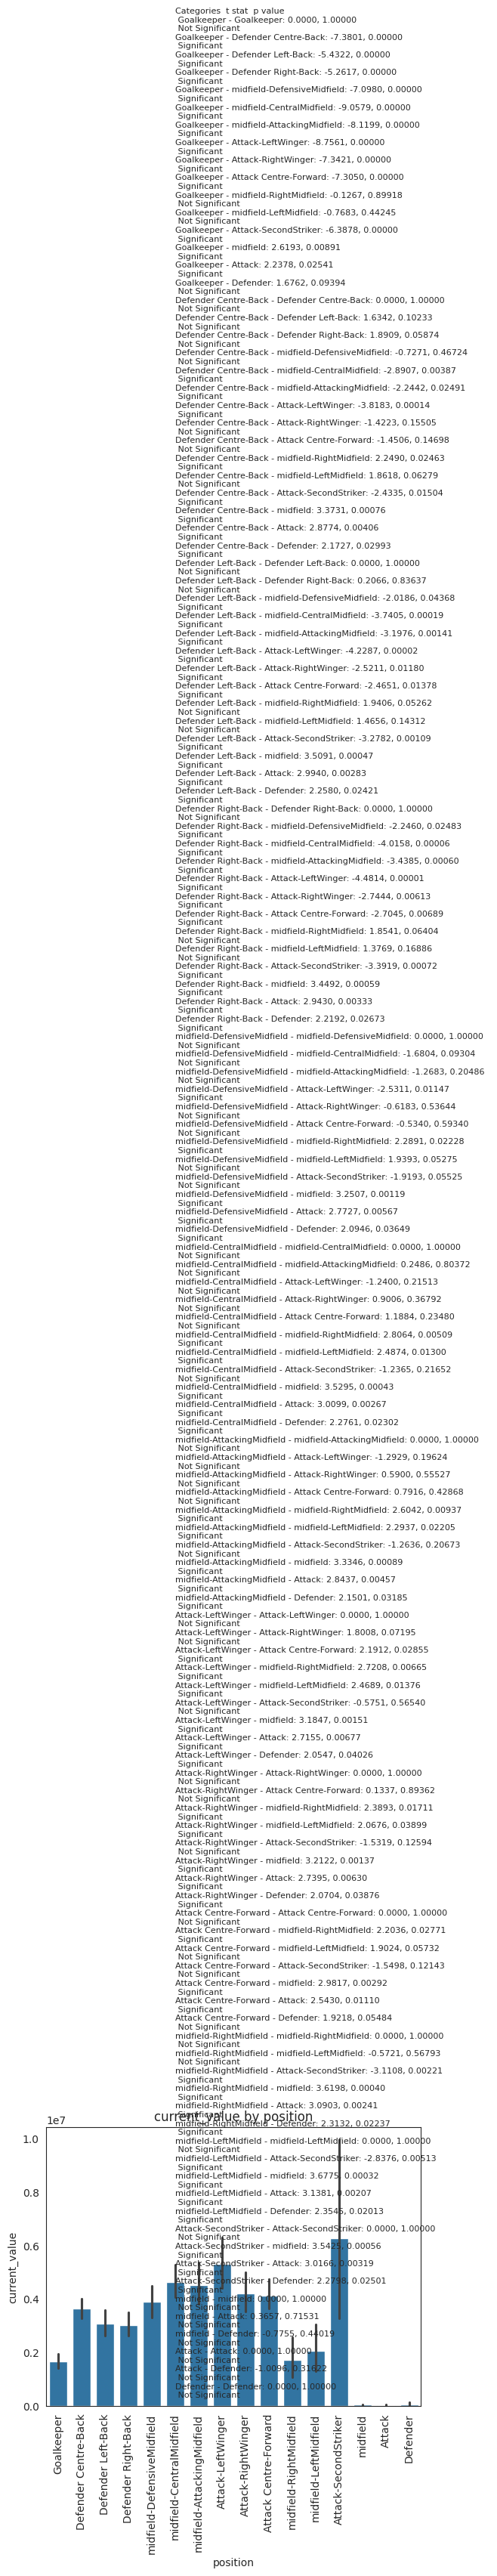

In [ ]:
barplots(df, "position", "current_value")

There is too much category and not enough data points to overcome issues related to cod hence I will only use position encoded.

In [ ]:
def scatter(dataframe, target, feature):
    from statsmodels.formula.api import ols
    from statsmodels.stats.diagnostic import het_breuschpagan
    from scipy import stats
    """
    Takes dataframe, target and feature as parameter
    Use it with a numeric column
    Fits an OLS model with the given feature
    Applies breuschpagan test
    Returns the scatterplot, regression and test results.
    """

    sns.set_style(style="white")

    model = ols(formula= f"{target}~{feature}", data = dataframe).fit()

    lm, p1, f, p2 = het_breuschpagan(model.resid,model.model.exog)
    m, b, r, p, err = stats.linregress(dataframe[feature], dataframe[target])

    string = "y = " + str(round(m,2)) + "x " + str(round(b,2)) + "\n"
    string += "r_2 = " + str(round(r**2, 4))  + "\n"
    string += str(round(r**2, 4)*100) + "% of variance is explained" + "\n"
    string += "p = " + str(round(p, 5)) + "\n"
    if p < 0.05:
        string += "Significant" + "\n"
    else:
        string += "Not Significant" + "\n"
    string += str(dataframe[feature].name) + " skew = " + str(round(dataframe[feature].skew(), 2)) + "\n"
    if dataframe[feature].skew() < 0:
        string += str(dataframe[feature].name) + " is negatively skewed" + "\n"
    else:
        string += str(dataframe[feature].name) + " is positively skewed" + "\n"
    string += str(dataframe[target].name) + " skew = " + str(round(dataframe[target].skew(), 2)) + "\n"
    if dataframe[target].skew() < 0:
        string += str(dataframe[target].name) + " is negatively skewed" + "\n"
    else:
        string += str(dataframe[target].name) + " is positively skewed" + "\n"
    string += str(dataframe[feature].name) + " Breushpagan Test = " + "LM stat: " + str(round(lm,4)) + " p value: " + str(round(p1,4)) + " F stat: " + str(round(f,4)) + " p value: " + str(round(p2,4)) + "\n"
    if p1 < 0.05:
        string += "Variance of residuals are not distributed equally" + "\n"
    else:
        string += "Variance of residuals are distributed equally" + "\n"
    ax = sns.jointplot(x = feature, y = target, kind = "reg", data = dataframe)
    ax.fig.text( 1, 0.1, string, fontsize = 12, transform = plt.gcf().transFigure)


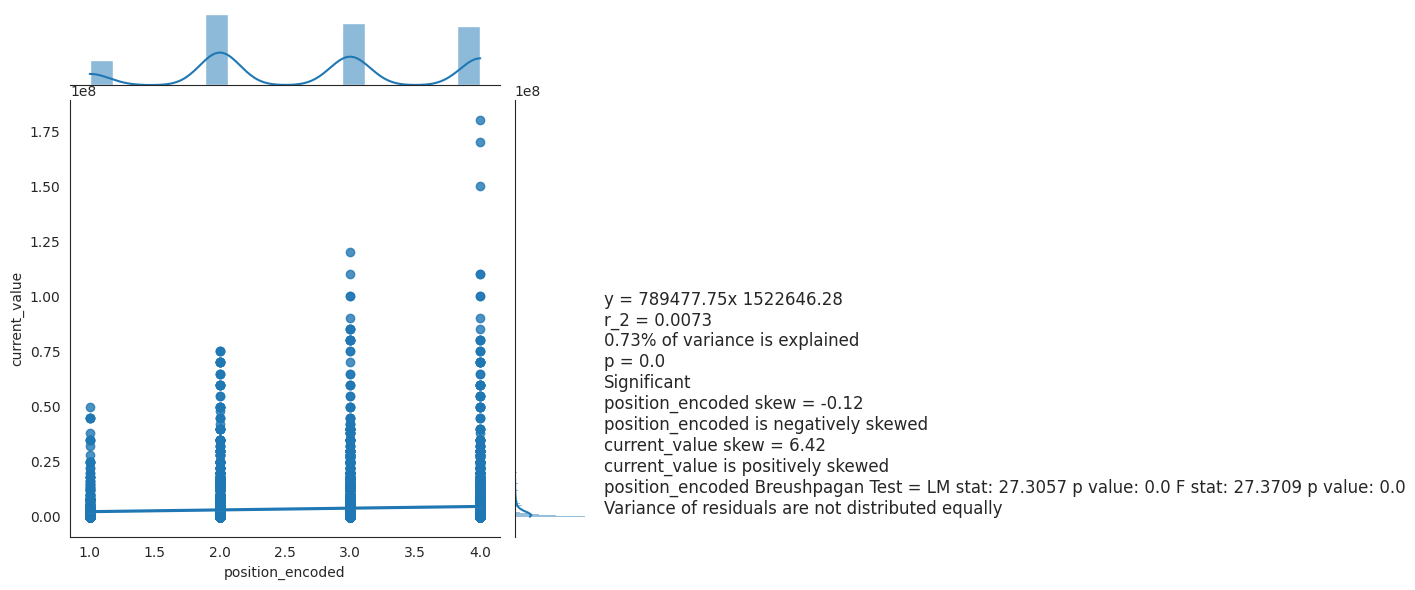

In [ ]:
scatter(df, "current_value", "position_encoded")

We observe that position is not relevant to the value as our pearson correlation test suggests.

In [ ]:
df = df.drop(["position"], axis = 1)

Last feature I will look at is the team column. Normally I would immediately drop 375 unique category since it is hard to handle all. But, since I am into football I cannot let any Galatasaray or City players to get roasted. Hence I will try to cluster the teams based on their level, league, team value.

In [ ]:
df["team"].unique()

array(['Manchester United', 'West Ham United', 'Leicester City',
       'Aston Villa', 'Wolverhampton Wanderers', 'Southampton FC',
       'Brighton &amp; Hove Albion', 'Everton FC', 'Nottingham Forest',
       'Leeds United', 'Crystal Palace', 'Fulham FC', 'AFC Bournemouth',
       'Brentford FC', 'Liverpool FC', 'Newcastle United',
       'Manchester City', 'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC',
       'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
       '1.FC Union Berlin', 'FC Augsburg', 'VfB Stuttgart',
       '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'FC Schalke 04',
       'VfL Bochum', 'SV Werder Bremen', 'Eintracht Frankfurt',
       'SC Freiburg', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
       'Bayern Munich', 'RB Leipzig', 'Real Sociedad', 'Villarreal CF',
       'Real Betis Balompié', 'Athletic Bilbao', 'Valencia CF',
       'Sevilla FC', 'Celta de Vigo', 'CA Osasuna', 'Girona FC',
       'Rayo Vallecano', 'RCD Mallorca', 'UD Almería',

In [ ]:
#Change Swallows FC to Moroka Swallows FC in df team names and some more
df.loc[df["team"] == "Swallows FC", "team"] = "Moroka Swallows FC"
df.loc[df["team"] == "Brighton &amp; Hove Albion", "team"] = "Brighton & Hove Albion"
df.loc[df["team"] == "Goiás Esporte Clube", "team"] = "Goiás EC"
df.loc[df["team"] == "Al-Hilal Saudi FC", "team"] = "Al-Hilal SFC"
df.loc[df["team"] == "Al-Ittihad Club (Jeddah)", "team"] = "Al-Ittihad Club"

### Web Scraping for Team Data and Some More EDA

In [ ]:
#Lets create a new dataframe with teams, league, total value, fifa stars
teams = pd.DataFrame(columns = ["team", "league", "total_value", "fifa_stars"])

In [ ]:
# Now we will scrape some data from transfermarkt
import requests
from bs4 import BeautifulSoup as bts
import time

In [ ]:
def getAndParseURL(url):
    result = requests.get(url, headers={"User-Agent":"Safari/537.36."})
    soup = bts(result.text, "html.parser")
    return soup

In [ ]:
df_teams = pd.DataFrame(columns = ["team", "avg_age", "foreigners","avg_value","total_value","league"])

In [ ]:
leagues = ["GB1","GB2","L1","ES1","IT1","FR1","NL1","PO1","RU1","TR1","A1","BRA1","MLS1","AR1N","MEX1","SFA1","JAP1","SA1","RSK1","AUS1"]
for league in leagues:
    for i in ["2022","2023"]:
      html = getAndParseURL(f"https://www.transfermarkt.com/{league}/startseite/wettbewerb/{league}/plus/?saison_id={i}")
      table = html.find('table', class_='items')
      print(league + " done")
      for row in table.tbody.find_all('tr'):
          # Find all data for each column
          columns = row.find_all('td')
          if(columns != []):
              team = columns[1].text.strip()
              avg_age = columns[3].text.strip()
              foreigners = columns[4].text.strip()
              avg_value = columns[5].text.strip()
              total_value = columns[6].text.strip()
              lig = league
              if team not in df_teams["team"].values:
                df_teams.loc[len(df_teams)] = [team, avg_age, foreigners, avg_value, total_value, lig]

GB1 done
GB1 done
GB2 done
GB2 done
L1 done
L1 done
ES1 done
ES1 done
IT1 done
IT1 done
FR1 done
FR1 done
NL1 done
NL1 done
PO1 done
PO1 done
RU1 done
RU1 done
TR1 done
TR1 done
A1 done
A1 done
BRA1 done
BRA1 done
MLS1 done
MLS1 done
AR1N done
AR1N done
MEX1 done
MEX1 done
SFA1 done
SFA1 done
JAP1 done
JAP1 done
SA1 done
SA1 done
RSK1 done
RSK1 done
AUS1 done
AUS1 done


In [ ]:
df_teams["team"].drop_duplicates(inplace=True)

In [ ]:
df_teams.team.nunique()

415

In [ ]:
#Lets merge the datasets now
df_new = df.merge(df_teams, on = "team", how = "left")

In [ ]:
df_new.head()

,team,name,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,highest_value_sqrt,highest_value_log,highest_value_fourier,veteran,never_played,never_awarded,avg_age,foreigners,avg_value,total_value,league
0,Manchester United,David de Gea,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0,8366.600265,18.064006,0.103066,0,0,0,24.9,29,€17.67m,€848.00m,GB1
1,Manchester United,Jack Butland,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0,4690.415760,16.906553,-0.999923,0,0,0,24.9,29,€17.67m,€848.00m,GB1
2,Manchester United,Tom Heaton,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0,2449.489743,15.607270,-0.839416,1,0,0,24.9,29,€17.67m,€848.00m,GB1
3,Manchester United,Lisandro Martínez,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0,7071.067812,17.727534,0.825647,0,0,0,24.9,29,€17.67m,€848.00m,GB1
4,Manchester United,Raphaël Varane,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0,8944.271910,18.197537,0.324799,0,0,0,24.9,29,€17.67m,€848.00m,GB1


In [ ]:
df_new[df_new["league"].isnull()].team.unique()

array(['Torpedo Moscow', 'CA Colon', 'Club Atlético Unión',
       'Instituto AC Córdoba', 'Arsenal Fútbol Club',
       'Club Atlético Talleres', 'Al-Shabab Club (Riyadh)', 'Ettifaq FC',
       'Al-Tai', 'Al-Khaleej'], dtype=object)

In [ ]:
#Lets drop the points with unknown leagues
print(len(df_new[df_new["league"].isnull()]))
df_new = df_new[df_new["league"].notna()]

284


We lost another 284 data points.

<Axes: xlabel='league', ylabel='current_value'>

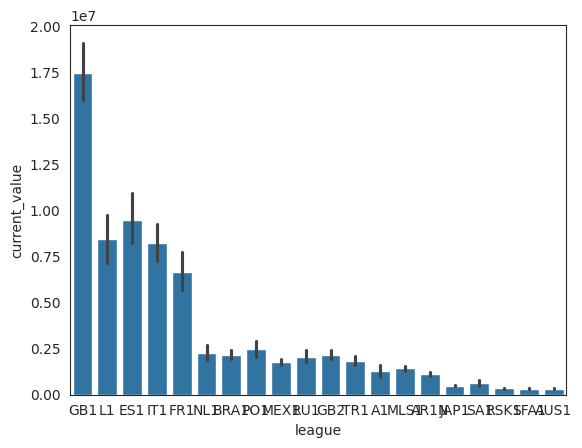

In [ ]:
#Lets first check the relation between league and current value
sns.barplot(data = df_new, x = "league", y = "current_value")

I guess we got a good new feature. Lets make a t test to see the significance.

In [ ]:
#Apply t test
from scipy import stats
for league in df_new["league"].unique():
    g1 = df_new[df_new["league"] == league]["current_value"]
    g2 = df_new[df_new["league"] != league]["current_value"]
    t, p = stats.ttest_ind(g1,g2)
    print(f"{league}: {t:.4f}, {p:.5f}")

GB1: 40.8066, 0.00000
L1: 11.8659, 0.00000
ES1: 14.3443, 0.00000
IT1: 11.9526, 0.00000
FR1: 7.5133, 0.00000
NL1: -3.6050, 0.00031
BRA1: -4.4617, 0.00001
PO1: -3.1753, 0.00150
MEX1: -4.7080, 0.00000
RU1: -3.6205, 0.00030
GB2: -4.0959, 0.00004
TR1: -4.7982, 0.00000
A1: -5.0933, 0.00000
MLS1: -7.4926, 0.00000
AR1N: -7.4570, 0.00000
JAP1: -8.6787, 0.00000
SA1: -6.7339, 0.00000
RSK1: -8.1345, 0.00000
SFA1: -8.7761, 0.00000
AUS1: -6.6704, 0.00000


Above results with almost all t values > 10 and p values app. 0 suggests a highly influential feature.

In [ ]:
#lets one hot code the league with 0 1s
df_new = pd.get_dummies(df_new, columns = ["league"],drop_first=1, prefix = "league", prefix_sep = "_", dtype = int)

In [ ]:
correlation(df_new,"current_value")

,Columns,P-Value,Correlation Coefficient(r),Absolute r
highest_value,current_value-highest_value,0.0000,0.834000,0.834000
highest_value_sqrt,current_value-highest_value_sqrt,0.0000,0.769135,0.769135
highest_value_log,current_value-highest_value_log,0.0000,0.550673,0.550673
minutes played,current_value-minutes played,0.0000,0.420357,0.420357
appearance,current_value-appearance,0.0000,0.419007,0.419007
league_GB1,current_value-league_GB1,0.0000,0.372385,0.372385
award,current_value-award,0.0000,0.298332,0.298332
never_awarded,current_value-never_awarded,0.0000,-0.187115,0.187115
assists,current_value-assists,0.0000,0.139978,0.139978
league_ES1,current_value-league_ES1,0.0000,0.139662,0.139662


<Axes: xlabel='goals conceded', ylabel='current_value'>

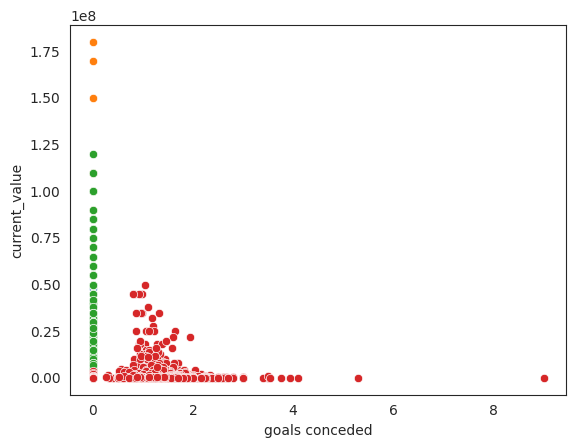

In [ ]:
# Lets look at the relation btw goals conceded vs current value for goalkeepers
sns.scatterplot(data = df_new[df_new["position_encoded"] == 2], x = "goals conceded", y = "current_value")
sns.scatterplot(data = df_new[df_new["position_encoded"] == 4], x = "goals conceded", y = "current_value")
sns.scatterplot(data = df_new[df_new["position_encoded"] == 3], x = "goals conceded", y = "current_value")
sns.scatterplot(data = df_new[df_new["position_encoded"] == 1], x = "goals conceded", y = "current_value")

As we can see above, goals conceded is only related to goalkeepers. Hence I will use this feature only for goalkeepers.

<ipython-input-57-38362c3b4c92>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<Axes: title={'center': 'Midfield Goals'}, xlabel='goals', ylabel='current_value'>

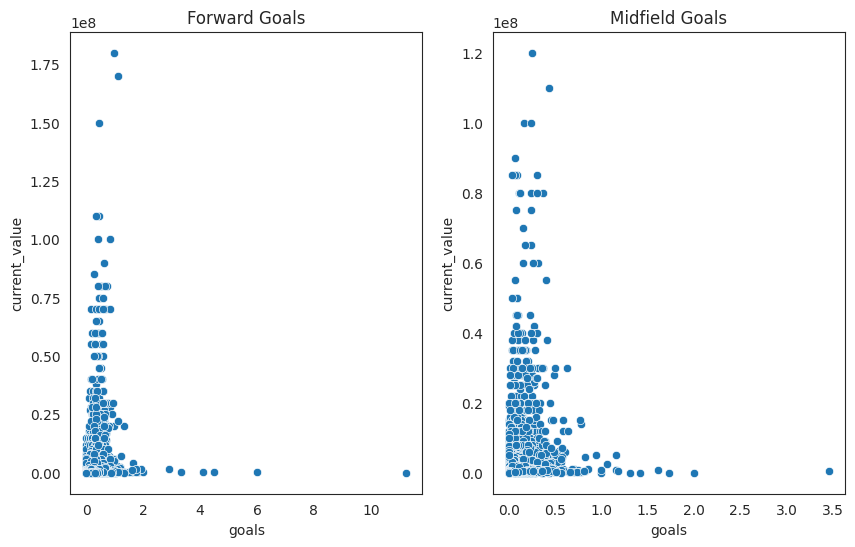

In [ ]:
#Lets look at the assist and goals also
plt.subplots(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Forward Goals")
sns.scatterplot(data = df_new[df_new["position_encoded"] == 4], x = "goals", y = "current_value")
plt.subplot(1,2,2)
plt.title("Midfield Goals")
sns.scatterplot(data = df_new[df_new["position_encoded"] == 3], x = "goals", y = "current_value")

# Modelling

## Preprocessing

In [ ]:
#Lets drop name and team column
df_new = df_new.drop(["team","name"], axis = 1)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10345 entries, 0 to 10628
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   height                 10345 non-null  float64
 1   age                    10345 non-null  float64
 2   appearance             10345 non-null  int64  
 3   goals                  10345 non-null  float64
 4   assists                10345 non-null  float64
 5   yellow cards           10345 non-null  float64
 6   second yellow cards    10345 non-null  float64
 7   red cards              10345 non-null  float64
 8   goals conceded         10345 non-null  float64
 9   clean sheets           10345 non-null  float64
 10  minutes played         10345 non-null  int64  
 11  days_injured           10345 non-null  int64  
 12  games_injured          10345 non-null  int64  
 13  award                  10345 non-null  int64  
 14  current_value          10345 non-null  int64  
 15  highest

In [ ]:
#Lets change the dtypes of objects to numeric type
df_new["avg_age"] = df_new["avg_age"].astype(float)
df_new["foreigners"] = df_new["foreigners"].astype(float)

In [ ]:
#Now we need to change the values in the avg_value and total_value with m and k and bn and remove £
df_new["avg_value"] = df_new["avg_value"].str.replace("m","000000").str.replace("k","000").str.replace("bn","000000000").str.replace("€","").str.replace(".","")
df_new["total_value"] = df_new["total_value"].str.replace("m","000000").str.replace("k","000").str.replace("bn","000000000").str.replace("€","").str.replace(".","")

In [ ]:
df_new["avg_value"] = df_new["avg_value"].astype(float)
df_new["total_value"] = df_new["total_value"].astype(float)

In [ ]:
#Let's split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new.drop(["current_value"], axis = 1), df_new["current_value"], test_size=0.2, random_state=42)

## Basic Model

In [ ]:
#Lets make a basic model with appearance, highest value, minutes played, age and award with OLS
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
features = ["appearance","highest_value","minutes played","age","award"]

In [ ]:
model = sm.OLS(y_train, sm.add_constant(X_train[features]))

In [ ]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          current_value   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     5089.
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:51:21   Log-Likelihood:            -1.3861e+05
No. Observations:                8276   AIC:                         2.772e+05
Df Residuals:                    8270   BIC:                         2.773e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.287e+06      3e+05     20.958      0.000     5.7e+06    6.88e+06
appearance     -4.655e+04   5783.953     -8.048      0.000   -5.79e+04   -3.52e+04
highest_value      0.5988      0.005    128.047      0.000       0.590       0.608
minutes played  1128.9108     75.503     14.952      0.000     980.906    1276.916
age             -2.59e+05   1.15e+04    -22.457      0.000   -2.82e+05   -2.36e+05
award           -3.39e+05   1.68e+04    -20.175      0.000   -3.72e+05   -3.06e+05
==============================================================================
Omnibus:                     2827.399   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           700986.928
Skew:                           0.335   Prob(JB):                         0.00
Kurtosis:                      48.082   Cond. No.                     8.98e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.98e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



*   As p values suggests all of the features we put in are significant. And our **r score** for the train data is 0.75



In [ ]:
print(f"MAE for training data: {mean_absolute_error(y_train, model.fit().predict(sm.add_constant(X_train[features])))}")
#For the test data
print(f"MAE for test data: {mean_absolute_error(y_test, model.fit().predict(sm.add_constant(X_test[features])))}")
LinReg_MAE = mean_absolute_error(y_test, model.fit().predict(sm.add_constant(X_test[features])))

MAE for training data: 2259890.353208101
MAE for test data: 2362572.6933170543


<Axes: xlabel='Actual', ylabel='Predicted'>

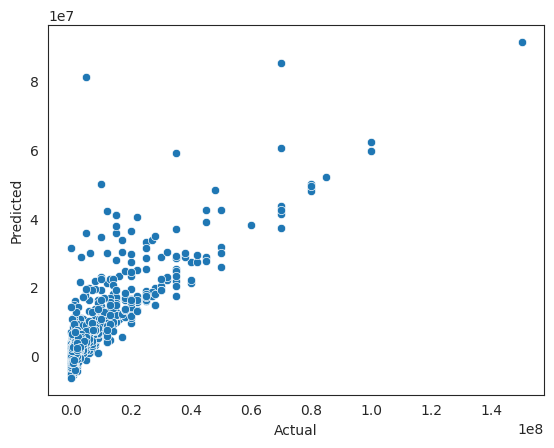

In [ ]:
#Lets scatter
plt.xlabel("Actual")
plt.ylabel("Predicted")
sns.scatterplot(x = y_test, y = model.fit().predict(sm.add_constant(X_test[features])))

For our basic model we entered 5 features for a linear regression model ended up with test score MAE:2362572

## Choosing Parameters with Cross Validation

Lets make the feature selection with step by step choosing the best next feature after training the model.

In [ ]:
from sklearn.feature_selection import SelectKBest, RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer

In [ ]:
min_features_to_select = 4

In [ ]:
clf = LinearRegression()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [ ]:
#score with mae
rfevc = RFECV( estimator=clf,
              step=1,
              cv=cv,
              scoring=make_scorer(mean_absolute_error, greater_is_better=False),
              min_features_to_select=min_features_to_select,
              n_jobs=2)

In [ ]:
rfevc.fit(X_train, y_train)

RFECV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
      estimator=LinearRegression(), min_features_to_select=4, n_jobs=2,
      scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [ ]:
print(f"Optimal number of features: {rfevc.n_features_}")

Optimal number of features: 45


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
pipe = make_pipeline(StandardScaler(), rfevc)

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('rfecv',
                 RFECV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None),
                       estimator=LinearRegression(), min_features_to_select=4,
                       n_jobs=2,
                       scoring=make_scorer(mean_absolute_error, greater_is_better=False)))])

In [ ]:
#Lets get the results for train and test
print(f"MAE for training data: {mean_absolute_error(y_train, pipe.predict(X_train))}")
print(f"MAE for test data: {mean_absolute_error(y_test, pipe.predict(X_test))}")
stepwise_MAE = mean_absolute_error(y_test, pipe.predict(X_test))

MAE for training data: 2094643.8047425083
MAE for test data: 2141047.6444296064


Using a stepwise feature selection method decreased the MAE about 10%.

## Ridge and Lasso

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
ridge = Ridge().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.46986e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.490e+16, tolerance: 6.960e+13
  model = cd_fast.enet_coordinate_descent(


In [ ]:
print(f"Ridge MAE for training data: {mean_absolute_error(y_train, ridge.predict(X_train))}")
print(f"Ridge MAE for test data: {mean_absolute_error(y_test, ridge.predict(X_test))}")
print(f"Lasso MAE for training data:{mean_absolute_error(y_train, lasso.predict(X_train))}")
print(f"Lasso MAE for test data: {mean_absolute_error(y_test, lasso.predict(X_test))}")
ridge_MAE = mean_absolute_error(y_test, ridge.predict(X_test))
lasso_MAE = mean_absolute_error(y_test, lasso.predict(X_test))

Ridge MAE for training data: 2160056.1973207095
Ridge MAE for test data: 2245246.866941959
Lasso MAE for training data:2160886.65558584
Lasso MAE for test data: 2246141.357428555


As MAE's increased, we fail to increase the accuracy with Lasso and Ridge

## Neural Network

In [ ]:
#Lets train a neural network with 2 layers lastly
import tensorflow as tf
from tensorflow import keras
#float all features
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [ ]:
nn = keras.Sequential([
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(1)
])

In [ ]:
nn.compile(optimizer = "adam", loss = "mean_absolute_error")

In [ ]:
nn.fit(X_train, y_train, epochs = 500)

Epoch 1/500
259/259 [==============================] - 1s 2ms/step - loss: 47507636.0000
Epoch 2/500
259/259 [==============================] - 0s 2ms/step - loss: 41283228.0000
Epoch 3/500
259/259 [==============================] - 1s 2ms/step - loss: 33086996.0000
Epoch 4/500
259/259 [==============================] - 0s 2ms/step - loss: 14450614.0000
Epoch 5/500
259/259 [==============================] - 1s 2ms/step - loss: 21732646.0000
Epoch 6/500
259/259 [==============================] - 0s 2ms/step - loss: 23701800.0000
Epoch 7/500
259/259 [==============================] - 1s 2ms/step - loss: 16874618.0000
Epoch 8/500
259/259 [==============================] - 0s 2ms/step - loss: 11183430.0000
Epoch 9/500
259/259 [==============================] - 1s 2ms/step - loss: 16909962.0000
Epoch 10/500
259/259 [==============================] - 0s 2ms/step - loss: 13577652.0000
Epoch 11/500
259/259 [==============================] - 0s 2ms/step - loss: 14119075.0000
Epoch 12/500
259/25

In [ ]:
print(f"MAE for training data: {mean_absolute_error(y_train, nn.predict(X_train))}")
print(f"MAE for test data: {mean_absolute_error(y_test, nn.predict(X_test))}")
nn_MAE = mean_absolute_error(y_test, nn.predict(X_test))

259/259 [==============================] - 0s 1ms/step
MAE for training data: 1678111.676307999
65/65 [==============================] - 0s 1ms/step
MAE for test data: 1823259.963095472
65/65 [==============================] - 0s 1ms/step


The best result we got comes from a 2 layered neural network with MAE: 1777952

## Feature Selection by Position

In [ ]:
goalkeepers = df_new[df_new["position_encoded"] == 1]
defenders = df_new[df_new["position_encoded"] == 2]
midfielders = df_new[df_new["position_encoded"] == 3]
forwards = df_new[df_new["position_encoded"] == 4]

In [ ]:
#split the data
goalkeepers_train, goalkeepers_test, goalkeepers_y_train, goalkeepers_y_test = train_test_split(goalkeepers.drop(["current_value"], axis = 1), goalkeepers["current_value"], test_size=0.2, random_state=42)
defenders_train, defenders_test, defenders_y_train, defenders_y_test = train_test_split(defenders.drop(["current_value"], axis = 1), defenders["current_value"], test_size=0.2, random_state=42)
midfielders_train, midfielders_test, midfielders_y_train, midfielders_y_test = train_test_split(midfielders.drop(["current_value"], axis = 1), midfielders["current_value"], test_size=0.2, random_state=42)
forwards_train, forwards_test, forwards_y_train, forwards_y_test = train_test_split(forwards.drop(["current_value"], axis = 1), forwards["current_value"], test_size=0.2, random_state=42)


In [ ]:
#Lets start by fitting an OLS for goalkeepers and observe the importance of features
model = sm.OLS(goalkeepers_y_train, sm.add_constant(goalkeepers_train))
#sort summary by p value
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          current_value   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     84.96
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          3.94e-284
Time:                        20:56:58   Log-Likelihood:                -15177.
No. Observations:                 945   AIC:                         3.044e+04
Df Residuals:                     901   BIC:                         3.066e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
height                 1.682e+04   1.86e+04      0.904      0.366   -1.97e+04    5.33e+04
age                   -1.049e+05   2.21e+04     -4.756      0.000   -1.48e+05   -6.16e+04
appearance            -6.795e+04   1.52e+05     -0.446      0.656   -3.67e+05    2.31e+05
goals                 -7.329e+06   1.32e+07     -0.554      0.579   -3.33e+07    1.86e+07
assists                   0.0073      0.018      0.402      0.688      -0.028       0.043
yellow cards          -1281.9568   9.45e+05     -0.001      0.999   -1.86e+06    1.85e+06
second yellow cards    6.895e+06   7.48e+06      0.922      0.357   -7.78e+06    2.16e+07
red cards              8.206e+05   1.75e+06      0.468      0.640   -2.62e+06    4.26e+06
goals conceded        -1.818e+05   1.54e+05     -1.183      0.237   -4.83e+05     1.2e+05
clean sheets          -4061.3695   2.65e+04     -0.154      0.878    -5.6e+04    4.79e+04
minutes played         1022.9209   1688.527      0.606      0.545   -2290.984    4336.825
days_injured           2330.8434   1535.354      1.518      0.129    -682.442    5344.129
games_injured         -3.837e+04   1.22e+04     -3.150      0.002   -6.23e+04   -1.45e+04
award                 -2.184e+05   3.18e+04     -6.862      0.000   -2.81e+05   -1.56e+05
highest_value             0.4548      0.035     12.960      0.000       0.386       0.524
position_encoded      -2.984e+06   4.35e+06     -0.685      0.493   -1.15e+07    5.56e+06
winger                 1.074e-07    3.6e-07      0.298      0.766   -5.99e-07    8.14e-07
highest_value_sqrt      295.1792    377.529      0.782      0.434    -445.758    1036.117
highest_value_log      1.388e+05   1.73e+05      0.803      0.422      -2e+05    4.78e+05
highest_value_fourier  1.526e+04   1.21e+05      0.126      0.900   -2.23e+05    2.53e+05
veteran               -3.227e+05   3.32e+05     -0.972      0.331   -9.74e+05    3.29e+05
never_played          -2.667e+05   3.49e+05     -0.764      0.445   -9.51e+05    4.18e+05
never_awarded         -5.941e+05   1.96e+05     -3.027      0.003   -9.79e+05   -2.09e+05
avg_age                4.305e+04   7.86e+04      0.548      0.584   -1.11e+05    1.97e+05
foreigners             1.396e+04      2e+04      0.698      0.485   -2.53e+04    5.32e+04
avg_value                 0.0044      0.001      3.492      0.001       0.002       0.007
total_value              -0.0001   3.52e-05     -2.953      0.003      -0.000   -3.49e-05
league_AR1N            7.908e+05   6.04e+05      1.309      0.191   -3.95e+05    1.98e+06
league_AUS1            1.061e+05   6.18e+05      0.172      0.864   -1.11e+06    1.32e+06
league_BRA1            7.877e+05   5.94e+05      1.327      0.185   -3.78e+05    1.95e+06
league_ES1            -1.178e+06   5.99e+05     -1.966      0.050   -2.35e+06   -2052.479
league_FR1            -

In [ ]:
print(f"MAE for training data: {mean_absolute_error(goalkeepers_y_train, model.fit().predict(sm.add_constant(goalkeepers_train)))}")
print(f"MAE for test data: {mean_absolute_error(goalkeepers_y_test, model.fit().predict(sm.add_constant(goalkeepers_test)))}")

MAE for training data: 1161626.070110953
MAE for test data: 1226304.0961644447


In [ ]:
#Lets only take the features with p value <0.05
features = model.fit().pvalues[model.fit().pvalues < 0.05].index

In [ ]:
feature_selected = sm.OLS(goalkeepers_y_train, sm.add_constant(goalkeepers_train[features]))

In [ ]:
feature_selected.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          current_value   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     420.3
Date:                Mon, 01 Jul 2024   Prob (F-statistic):          1.22e-303
Time:                        20:56:58   Log-Likelihood:                -15223.
No. Observations:                 945   AIC:                         3.046e+04
Df Residuals:                     936   BIC:                         3.051e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.086e+06   4.82e+05      6.405      0.000    2.14e+06    4.03e+06
age           -7.638e+04   1.68e+04     -4.554      0.000   -1.09e+05   -4.35e+04
games_injured -2.047e+04   4352.204     -4.703      0.000    -2.9e+04   -1.19e+04
award         -2.159e+05   3.05e+04     -7.075      0.000   -2.76e+05   -1.56e+05
highest_value     0.5331      0.011     47.262      0.000       0.511       0.555
never_awarded -8.166e+05    1.9e+05     -4.306      0.000   -1.19e+06   -4.44e+05
avg_value         0.0029      0.001      2.824      0.005       0.001       0.005
total_value   -7.104e-05   2.86e-05     -2.487      0.013      -0.000    -1.5e-05
league_ES1    -7.584e+05   4.06e+05     -1.870      0.062   -1.55e+06    3.76e+04
==============================================================================
Omnibus:                      427.397   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20629.837
Skew:                           1.302   Prob(JB):                         0.00
Kurtosis:                      25.741   Cond. No.                     1.38e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print(f"MAE for training data: {mean_absolute_error(goalkeepers_y_train, feature_selected.fit().predict(sm.add_constant(goalkeepers_train[features])))}")
print(f"MAE for test data: {mean_absolute_error(goalkeepers_y_test, feature_selected.fit().predict(sm.add_constant(goalkeepers_test[features])))}")

MAE for training data: 1164498.8918983315
MAE for test data: 1185951.2938524836


* Here we have MAE : 1185955 for goalkeepers which seems better than the NN model for all players

In [ ]:
model2 = sm.OLS(defenders_y_train, sm.add_constant(defenders_train))
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          current_value   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     276.2
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:56:59   Log-Likelihood:                -44744.
No. Observations:                2720   AIC:                         8.958e+04
Df Residuals:                    2676   BIC:                         8.984e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
height                 2.135e+04   1.46e+04      1.458      0.145   -7360.447    5.01e+04
age                   -2.361e+05   1.94e+04    -12.186      0.000   -2.74e+05   -1.98e+05
appearance            -5.687e+04   1.47e+04     -3.878      0.000   -8.56e+04   -2.81e+04
goals                  2.513e+05   9.21e+05      0.273      0.785   -1.56e+06    2.06e+06
assists                5.778e+05   6.52e+05      0.886      0.376   -7.01e+05    1.86e+06
yellow cards           6.058e+04   2.05e+05      0.295      0.768   -3.42e+05    4.63e+05
second yellow cards    4.443e+05   3.15e+06      0.141      0.888   -5.73e+06    6.62e+06
red cards             -1.927e+06   2.44e+06     -0.791      0.429    -6.7e+06    2.85e+06
goals conceded         1.447e-05   2.93e-05      0.493      0.622   -4.31e-05     7.2e-05
clean sheets              0.0022      0.004      0.494      0.621      -0.006       0.011
minutes played         1280.4197    164.341      7.791      0.000     958.172    1602.667
days_injured           5699.6260   1225.584      4.651      0.000    3296.438    8102.814
games_injured         -5.765e+04   9475.620     -6.084      0.000   -7.62e+04   -3.91e+04
award                 -3.445e+05   2.71e+04    -12.691      0.000   -3.98e+05   -2.91e+05
highest_value             0.8263      0.032     26.051      0.000       0.764       0.888
position_encoded      -8.865e+06   1.85e+06     -4.796      0.000   -1.25e+07   -5.24e+06
winger                 8.473e+04   1.87e+05      0.452      0.651   -2.83e+05    4.52e+05
highest_value_sqrt    -3017.2498    345.748     -8.727      0.000   -3695.211   -2339.289
highest_value_log      1.317e+06   1.68e+05      7.855      0.000    9.88e+05    1.65e+06
highest_value_fourier -2.318e+05   9.73e+04     -2.382      0.017   -4.23e+05    -4.1e+04
veteran                1.431e+04   4.03e+05      0.036      0.972   -7.76e+05    8.05e+05
never_played           3.512e+05   4.81e+05      0.730      0.465   -5.92e+05    1.29e+06
never_awarded         -9.357e+05   1.63e+05     -5.740      0.000   -1.26e+06   -6.16e+05
avg_age                1.378e+05   6.85e+04      2.012      0.044    3470.986    2.72e+05
foreigners             2.216e+04   1.65e+04      1.342      0.180   -1.02e+04    5.45e+04
avg_value                 0.0016      0.001      1.440      0.150      -0.001       0.004
total_value            5.878e-05   3.13e-05      1.881      0.060    -2.5e-06       0.000
league_AR1N            2.098e+06    5.2e+05      4.037      0.000    1.08e+06    3.12e+06
league_AUS1            1.039e+06   5.25e+05      1.977      0.048    8670.273    2.07e+06
league_BRA1            1.335e+06    5.3e+05      2.522      0.012    2.97e+05    2.37e+06
league_ES1            -1.403e+06    5.1e+05     -2.751      0.006    -2.4e+06   -4.03e+05
league_FR1            -

In [ ]:
print(f"MAE for training data: {mean_absolute_error(defenders_y_train, model2.fit().predict(sm.add_constant(defenders_train)))}")
print(f"MAE for test data: {mean_absolute_error(defenders_y_test, model2.fit().predict(sm.add_constant(defenders_test)))}")

MAE for training data: 1862992.5752305868
MAE for test data: 1969061.6671571177


In [ ]:
features2 = model2.fit().pvalues[model2.fit().pvalues < 0.05].index
feature_selected2 = sm.OLS(defenders_y_train, sm.add_constant(defenders_train[features2]))
feature_selected2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          current_value   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     465.6
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:56:59   Log-Likelihood:                -44866.
No. Observations:                2720   AIC:                         8.978e+04
Df Residuals:                    2696   BIC:                         8.992e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                   -2.889e+05   1.91e+04    -15.099      0.000   -3.26e+05   -2.51e+05
appearance            -3.317e+04   1.41e+04     -2.346      0.019   -6.09e+04   -5442.088
minutes played          991.7641    158.864      6.243      0.000     680.256    1303.272
days_injured           4627.3988   1253.979      3.690      0.000    2168.541    7086.257
games_injured          -4.79e+04   9729.944     -4.923      0.000    -6.7e+04   -2.88e+04
award                 -2.926e+05    2.7e+04    -10.828      0.000   -3.46e+05    -2.4e+05
highest_value             0.8685      0.032     27.199      0.000       0.806       0.931
position_encoded       -4.86e+06   1.23e+06     -3.951      0.000   -7.27e+06   -2.45e+06
highest_value_sqrt    -2424.5295    343.644     -7.055      0.000   -3098.361   -1750.698
highest_value_log      1.201e+06   1.68e+05      7.130      0.000    8.71e+05    1.53e+06
highest_value_fourier -2.424e+05   1.01e+05     -2.400      0.016    -4.4e+05   -4.43e+04
never_awarded         -9.135e+05   1.68e+05     -5.448      0.000   -1.24e+06   -5.85e+05
avg_age                9.558e+04   6.59e+04      1.451      0.147   -3.36e+04    2.25e+05
league_AR1N             1.59e+06   3.72e+05      4.272      0.000     8.6e+05    2.32e+06
league_AUS1            6.455e+05   4.22e+05      1.529      0.126   -1.82e+05    1.47e+06
league_BRA1            1.002e+06   3.83e+05      2.618      0.009    2.51e+05    1.75e+06
league_ES1             -1.11e+06   3.32e+05     -3.346      0.001   -1.76e+06   -4.59e+05
league_GB2            -1.058e+06   3.15e+05     -3.358      0.001   -1.68e+06    -4.4e+05
league_IT1            -6.352e+05   3.12e+05     -2.037      0.042   -1.25e+06   -2.39e+04
league_JAP1            1.692e+06   3.79e+05      4.469      0.000     9.5e+05    2.43e+06
league_MLS1            1.204e+06   3.18e+05      3.786      0.000     5.8e+05    1.83e+06
league_RSK1            1.921e+06   3.98e+05      4.821      0.000    1.14e+06     2.7e+06
league_SA1             1.201e+06    4.2e+05      2.859      0.004    3.77e+05    2.02e+06
league_SFA1             9.76e+05   3.87e+05      2.522      0.012    2.17e+05    1.73e+06
==============================================================================
Omnibus:                      950.970   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56509.956
Skew:                          -0.831   Prob(JB):                         0.00
Kurtosis:                      25.268   Cond. No.                     2.23e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+08. This might indicate that there are

In [ ]:
print(f"MAE for training data: {mean_absolute_error(defenders_y_train, feature_selected2.fit().predict(sm.add_constant(defenders_train[features2])))}")
print(f"MAE for test data: {mean_absolute_error(defenders_y_test, feature_selected2.fit().predict(sm.add_constant(defenders_test[features2])))}")

MAE for training data: 1897200.18226436
MAE for test data: 1975612.5250815975


* Worse than the **general best model**

In [ ]:
model3 = sm.OLS(midfielders_y_train, sm.add_constant(midfielders_train))
model3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          current_value   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     214.2
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:56:59   Log-Likelihood:                -39531.
No. Observations:                2373   AIC:                         7.915e+04
Df Residuals:                    2329   BIC:                         7.940e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
height                 2.736e+04    1.6e+04      1.713      0.087   -3955.445    5.87e+04
age                   -2.901e+05   2.59e+04    -11.220      0.000   -3.41e+05   -2.39e+05
appearance            -4.968e+04   1.34e+04     -3.694      0.000    -7.6e+04   -2.33e+04
goals                  4.676e+05   5.47e+05      0.855      0.393   -6.05e+05    1.54e+06
assists                7.826e+05   5.88e+05      1.331      0.183   -3.71e+05    1.94e+06
yellow cards           3.805e+05   3.23e+05      1.179      0.239   -2.53e+05    1.01e+06
second yellow cards    1.105e+06   3.26e+06      0.340      0.734   -5.28e+06    7.49e+06
red cards              7.856e+04   5.93e+05      0.132      0.895   -1.09e+06    1.24e+06
goals conceded        -1.371e-06   3.09e-07     -4.430      0.000   -1.98e-06   -7.64e-07
clean sheets           2.786e-07   6.23e-08      4.475      0.000    1.57e-07    4.01e-07
minutes played         1465.5076    156.302      9.376      0.000    1159.001    1772.014
days_injured           5212.2750   1990.238      2.619      0.009    1309.452    9115.098
games_injured         -5.736e+04   1.47e+04     -3.899      0.000   -8.62e+04   -2.85e+04
award                  -5.46e+05   3.58e+04    -15.274      0.000   -6.16e+05   -4.76e+05
highest_value             0.6800      0.031     22.043      0.000       0.619       0.740
position_encoded      -5.025e+06   1.43e+06     -3.525      0.000   -7.82e+06   -2.23e+06
winger                -3.334e+05   3.59e+05     -0.930      0.353   -1.04e+06     3.7e+05
highest_value_sqrt    -1525.2497    365.418     -4.174      0.000   -2241.829    -808.671
highest_value_log      8.979e+05   1.93e+05      4.664      0.000     5.2e+05    1.28e+06
highest_value_fourier -1.325e+05   1.28e+05     -1.038      0.299   -3.83e+05    1.18e+05
veteran               -7.239e+05   5.58e+05     -1.296      0.195   -1.82e+06    3.71e+05
never_played           2.804e+05   6.03e+05      0.465      0.642   -9.03e+05    1.46e+06
never_awarded         -1.392e+06   2.19e+05     -6.347      0.000   -1.82e+06   -9.62e+05
avg_age                2.307e+05   8.88e+04      2.598      0.009    5.66e+04    4.05e+05
foreigners             3.294e+04   2.22e+04      1.483      0.138   -1.06e+04    7.65e+04
avg_value                 0.0109      0.001      7.328      0.000       0.008       0.014
total_value              -0.0002   4.19e-05     -5.270      0.000      -0.000      -0.000
league_AR1N            2.751e+06   6.72e+05      4.095      0.000    1.43e+06    4.07e+06
league_AUS1             9.55e+05   6.89e+05      1.385      0.166   -3.97e+05    2.31e+06
league_BRA1            2.667e+06   6.81e+05      3.916      0.000    1.33e+06       4e+06
league_ES1            -2.774e+06   6.73e+05     -4.118      0.000   -4.09e+06   -1.45e+06
league_FR1            -

In [ ]:
print(f"MAE for training data: {mean_absolute_error(midfielders_y_train, model3.fit().predict(sm.add_constant(midfielders_train)))}")
print(f"MAE for test data: {mean_absolute_error(midfielders_y_test, model3.fit().predict(sm.add_constant(midfielders_test)))}")

MAE for training data: 2280033.365134139
MAE for test data: 2800209.620351904


In [ ]:
features3 = model3.fit().pvalues[model3.fit().pvalues < 0.05].index
features_selected3 = sm.OLS(midfielders_y_train, sm.add_constant(midfielders_train[features3]))
features_selected3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          current_value   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     380.2
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:56:59   Log-Likelihood:                -39548.
No. Observations:                2373   AIC:                         7.915e+04
Df Residuals:                    2348   BIC:                         7.929e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                -2.831e+05   2.51e+04    -11.283      0.000   -3.32e+05   -2.34e+05
appearance          -5.33e+04   1.33e+04     -4.022      0.000   -7.93e+04   -2.73e+04
goals conceded        -0.1008      0.015     -6.915      0.000      -0.129      -0.072
clean sheets           0.0390      0.006      6.692      0.000       0.028       0.050
minutes played      1496.0266    154.880      9.659      0.000    1192.311    1799.742
days_injured        5423.8287   1977.564      2.743      0.006    1545.875    9301.782
games_injured      -5.986e+04   1.46e+04     -4.087      0.000   -8.86e+04   -3.11e+04
award               -5.63e+05   3.48e+04    -16.175      0.000   -6.31e+05   -4.95e+05
highest_value          0.6696      0.030     22.198      0.000       0.610       0.729
position_encoded   -2.753e+06   9.59e+05     -2.870      0.004   -4.63e+06   -8.72e+05
highest_value_sqrt -1367.5400    354.886     -3.853      0.000   -2063.462    -671.618
highest_value_log   8.236e+05   1.85e+05      4.449      0.000    4.61e+05    1.19e+06
never_awarded      -1.392e+06   2.18e+05     -6.396      0.000   -1.82e+06   -9.65e+05
avg_age             2.038e+05   8.29e+04      2.459      0.014    4.13e+04    3.66e+05
avg_value              0.0087      0.001      6.692      0.000       0.006       0.011
total_value           -0.0001   3.53e-05     -4.167      0.000      -0.000   -7.78e-05
league_AR1N         2.343e+06    4.7e+05      4.985      0.000    1.42e+06    3.26e+06
league_BRA1         2.288e+06   4.73e+05      4.837      0.000    1.36e+06    3.22e+06
league_ES1         -2.796e+06   4.63e+05     -6.042      0.000    -3.7e+06   -1.89e+06
league_FR1         -1.379e+06   4.13e+05     -3.335      0.001   -2.19e+06   -5.68e+05
league_GB2          -1.08e+06   4.01e+05     -2.691      0.007   -1.87e+06   -2.93e+05
league_IT1         -1.116e+06   4.07e+05     -2.738      0.006   -1.91e+06   -3.17e+05
league_JAP1         2.579e+06   4.41e+05      5.847      0.000    1.71e+06    3.44e+06
league_MLS1          1.45e+06   4.27e+05      3.398      0.001    6.13e+05    2.29e+06
league_RSK1         2.322e+06   5.16e+05      4.499      0.000    1.31e+06    3.33e+06
league_SA1          1.628e+06   5.03e+05      3.237      0.001    6.42e+05    2.61e+06
league_SFA1         1.235e+06   4.64e+05      2.665      0.008    3.26e+05    2.14e+06
==============================================================================
Omnibus:                      707.907   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64288.999
Skew:                          -0.385   Prob(JB):                         0.00
Kurtosis:                      28.487   Cond. No.                     1.19e+16
==============================================================================

In [ ]:
print(f"MAE for training data: {mean_absolute_error(midfielders_y_train, features_selected3.fit().predict(sm.add_constant(midfielders_train[features3])))}")
print(f"MAE for test data: {mean_absolute_error(midfielders_y_test, features_selected3.fit().predict(sm.add_constant(midfielders_test[features3])))}")

MAE for training data: 2290367.661023569
MAE for test data: 2749093.0770286815


Much worse than the general model

In [ ]:
model4 = sm.OLS(forwards_y_train, sm.add_constant(forwards_train))
model4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          current_value   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     175.7
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:57:00   Log-Likelihood:                -37858.
No. Observations:                2236   AIC:                         7.580e+04
Df Residuals:                    2192   BIC:                         7.606e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
height                 5427.1240   2.11e+04      0.257      0.797    -3.6e+04    4.68e+04
age                   -3.677e+05   3.44e+04    -10.678      0.000   -4.35e+05      -3e+05
appearance            -8.247e+04   1.56e+04     -5.298      0.000   -1.13e+05   -5.19e+04
goals                  1.497e+06   4.91e+05      3.050      0.002    5.35e+05    2.46e+06
assists                6.912e+05   7.35e+05      0.941      0.347    -7.5e+05    2.13e+06
yellow cards           2.662e+05   2.48e+05      1.076      0.282   -2.19e+05    7.52e+05
second yellow cards     4.18e+05   6.12e+06      0.068      0.946   -1.16e+07    1.24e+07
red cards              1.019e+05   1.44e+06      0.071      0.944   -2.73e+06    2.93e+06
goals conceded         1.322e-07   9.93e-08      1.332      0.183   -6.25e-08    3.27e-07
clean sheets          -2.533e-08   3.02e-08     -0.838      0.402   -8.46e-08    3.39e-08
minutes played         2013.5833    193.584     10.402      0.000    1633.957    2393.210
days_injured           2984.3285   2086.662      1.430      0.153   -1107.714    7076.371
games_injured         -3.881e+04   1.65e+04     -2.358      0.018   -7.11e+04   -6531.954
award                 -4.458e+05   3.32e+04    -13.417      0.000   -5.11e+05   -3.81e+05
highest_value             0.5436      0.028     19.267      0.000       0.488       0.599
position_encoded      -3.036e+06   1.39e+06     -2.188      0.029   -5.76e+06   -3.14e+05
winger                -1.773e+05   2.88e+05     -0.616      0.538   -7.42e+05    3.88e+05
highest_value_sqrt    -1567.1028    406.631     -3.854      0.000   -2364.525    -769.681
highest_value_log      1.032e+06   2.44e+05      4.223      0.000    5.53e+05    1.51e+06
highest_value_fourier  1.381e+04   1.74e+05      0.079      0.937   -3.28e+05    3.56e+05
veteran                 2.79e+05   7.53e+05      0.370      0.711    -1.2e+06    1.76e+06
never_played           6.605e+05      1e+06      0.658      0.510   -1.31e+06    2.63e+06
never_awarded         -1.421e+06   2.92e+05     -4.869      0.000   -1.99e+06   -8.49e+05
avg_age                 3.07e+05   1.18e+05      2.596      0.009    7.51e+04    5.39e+05
foreigners            -3.929e+04   3.03e+04     -1.298      0.194   -9.86e+04    2.01e+04
avg_value                 0.0157      0.002      7.639      0.000       0.012       0.020
total_value              -0.0002   5.59e-05     -4.466      0.000      -0.000      -0.000
league_AR1N            2.673e+06   9.45e+05      2.829      0.005     8.2e+05    4.53e+06
league_AUS1             1.29e+06   9.44e+05      1.366      0.172   -5.62e+05    3.14e+06
league_BRA1            2.334e+06   9.63e+05      2.423      0.015    4.45e+05    4.22e+06
league_ES1            -2.484e+06   9.43e+05     -2.635      0.008   -4.33e+06   -6.35e+05
league_FR1            -

In [ ]:
print(f"MAE for training data: {mean_absolute_error(forwards_y_train, model4.fit().predict(sm.add_constant(forwards_train)))}")
print(f"MAE for test data: {mean_absolute_error(forwards_y_test, model4.fit().predict(sm.add_constant(forwards_test)))}")

MAE for training data: 2710965.976238417
MAE for test data: 2690937.86292492


In [ ]:
features4 = model4.fit().pvalues[model4.fit().pvalues < 0.05].index
features_selected4 = sm.OLS(forwards_y_train, sm.add_constant(forwards_train[features4]))
features_selected4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          current_value   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     375.9
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:57:00   Log-Likelihood:                -37872.
No. Observations:                2236   AIC:                         7.579e+04
Df Residuals:                    2215   BIC:                         7.591e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                -3.331e+05   3.27e+04    -10.183      0.000   -3.97e+05   -2.69e+05
appearance         -1.012e+05   1.43e+04     -7.084      0.000   -1.29e+05   -7.32e+04
goals               1.529e+06    4.6e+05      3.326      0.001    6.28e+05    2.43e+06
minutes played      2137.0948    189.350     11.287      0.000    1765.773    2508.416
games_injured      -2.144e+04   5920.822     -3.622      0.000   -3.31e+04   -9833.058
award              -4.446e+05   3.25e+04    -13.670      0.000   -5.08e+05   -3.81e+05
highest_value          0.5444      0.028     19.790      0.000       0.490       0.598
position_encoded   -2.677e+06    9.2e+05     -2.910      0.004   -4.48e+06   -8.73e+05
highest_value_sqrt -1515.5302    392.120     -3.865      0.000   -2284.491    -746.570
highest_value_log   8.649e+05   2.27e+05      3.803      0.000    4.19e+05    1.31e+06
never_awarded      -1.479e+06   2.86e+05     -5.175      0.000   -2.04e+06   -9.19e+05
avg_age             3.668e+05   9.44e+04      3.884      0.000    1.82e+05    5.52e+05
avg_value              0.0165      0.002      8.633      0.000       0.013       0.020
total_value           -0.0003   5.19e-05     -5.286      0.000      -0.000      -0.000
league_AR1N         2.243e+06   5.46e+05      4.108      0.000    1.17e+06    3.31e+06
league_BRA1         2.075e+06   5.82e+05      3.566      0.000    9.34e+05    3.22e+06
league_ES1         -2.459e+06    5.9e+05     -4.170      0.000   -3.62e+06    -1.3e+06
league_GB1          2.657e+06   6.93e+05      3.832      0.000     1.3e+06    4.02e+06
league_JAP1         1.877e+06   6.19e+05      3.031      0.002    6.63e+05    3.09e+06
league_L1           -2.22e+06   6.11e+05     -3.636      0.000   -3.42e+06   -1.02e+06
league_RSK1         1.718e+06   6.06e+05      2.835      0.005     5.3e+05    2.91e+06
==============================================================================
Omnibus:                     1113.068   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251380.989
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                      54.890   Cond. No.                     1.74e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print(f"MAE for training data: {mean_absolute_error(forwards_y_train, features_selected4.fit().predict(sm.add_constant(forwards_train[features4])))}")
print(f"MAE for test data: {mean_absolute_error(forwards_y_test, features_selected4.fit().predict(sm.add_constant(forwards_test[features4])))}")

MAE for training data: 2712668.3728345064
MAE for test data: 2709683.1737643415


From these results, although we seem to achieve a better result on the goalkeepers; we are failing in the other positions. One reason for that can be the variability of other positions than GK is much more.

<Axes: xlabel='current_value', ylabel='position_encoded'>

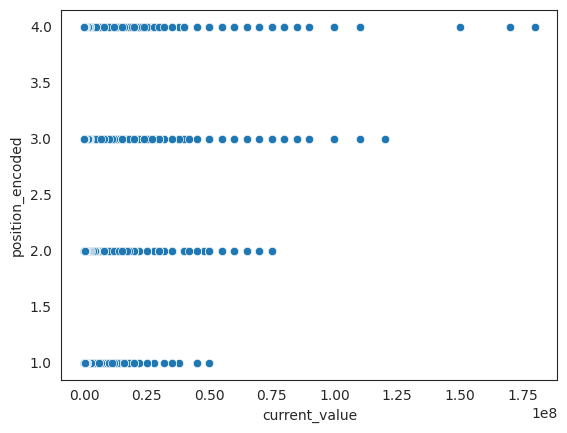

In [ ]:
#scatter the current values based on the positions
sns.scatterplot(data = df_new, x = "current_value", y = "position_encoded")

* Here we can see than position encoded = 1 players have a shorter range than others

## Comparison of *General Models*

In [ ]:
#Lets compare the MAE's of different models and plot
models = ["Linear Regression", "Stepwise Regression", "Ridge Regression", "Lasso Regression", "Neural Network"]
MAE = [LinReg_MAE, stepwise_MAE, ridge_MAE, lasso_MAE, nn_MAE]
comparison = pd.DataFrame(columns = ["Model", "MAE"])

Text(0.5, 1.0, 'Model Comparison')

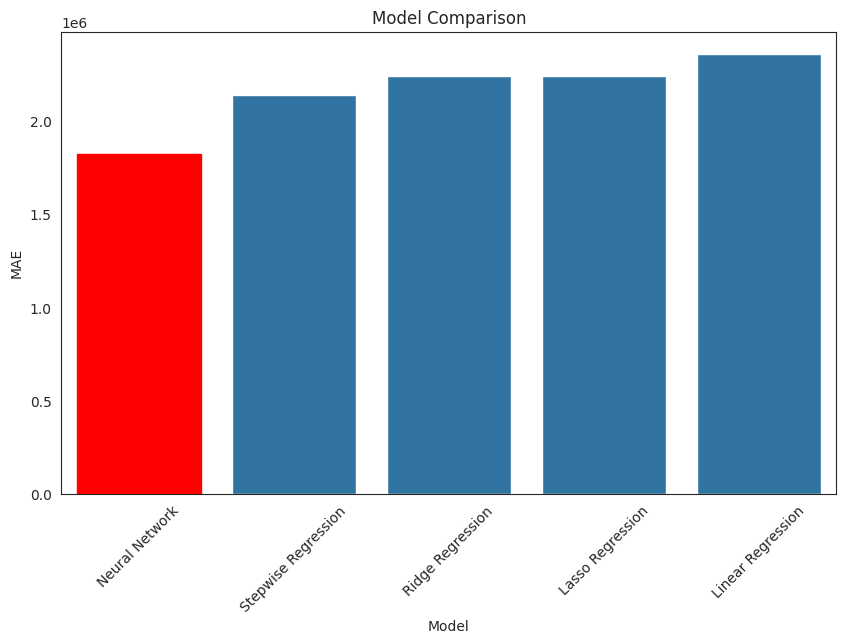

In [ ]:
comparison["Model"] = models
comparison["MAE"] = MAE
comparison.sort_values(by = "MAE", inplace = True)
plt.figure(figsize=(10,6))
ax = sns.barplot(data = comparison, x = "Model", y = "MAE")
min_value = comparison["MAE"].min()
max_value = comparison["MAE"].max()
ax.patches[0].set_color('red')
plt.xlabel("Model")
plt.ylabel("MAE")
plt.xticks(rotation=45)
plt.title("Model Comparison")

## Conclusion with De Bruyne Prediction




In [ ]:
#lets look at the current value of a new player with nn we have
X_train.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'highest_value', 'position_encoded', 'winger', 'highest_value_sqrt',
       'highest_value_log', 'highest_value_fourier', 'veteran', 'never_played',
       'never_awarded', 'avg_age', 'foreigners', 'avg_value', 'total_value',
       'league_AR1N', 'league_AUS1', 'league_BRA1', 'league_ES1', 'league_FR1',
       'league_GB1', 'league_GB2', 'league_IT1', 'league_JAP1', 'league_L1',
       'league_MEX1', 'league_MLS1', 'league_NL1', 'league_PO1', 'league_RSK1',
       'league_RU1', 'league_SA1', 'league_SFA1', 'league_TR1'],
      dtype='object')

In [ ]:
#We will look at the value of De Bruyne
height = 181
age = 33
appearances = 65
goals = 16
assists = 49
yellow_cards = 5
second_yellow_cards = 0
red_cards = 0
goals_conceded = 0
clean_sheets = 0
minutes_played = 5446
days_injured = 56
games_injured = 8
award = 31
highest_value =150000000
position_encoded = 3
winger = 1
highest_value_sqrt = np.sqrt(highest_value)
highest_value_log = np.log(highest_value)
highest_value_fourier = np.sin(highest_value)
veteran = 0
never_played = 0
never_awarded = 0
avg_age = 26.3
foreigners = 20
avg_value = 47700000
total_value = 1380000000
#league_AR1N', 'league_AUS1', 'league_BRA1', 'league_ES1', 'league_FR1','league_GB1', 'league_GB2', 'league_IT1', 'league_JAP1', 'league_L1''league_MEX1', 'league_MLS1', 'league_NL1', 'league_PO1', 'league_RSK1','league_RU1', 'league_SA1', 'league_SFA1', 'league_TR1']
#only gb1 = 1
league_AR1N = 0
league_AUS1 = 0
league_BRA1 = 0
league_ES1 = 0
league_FR1 = 0
league_GB1 = 1
league_GB2 = 0
league_IT1 = 0
league_JAP1 = 0
league_L1 = 0
league_MEX1 = 0
league_MLS1 = 0
league_NL1 = 0
league_PO1 = 0
league_RSK1 = 0
league_RU1 = 0
league_SA1 = 0
league_SFA1 = 0
league_TR1 = 0

In [ ]:
#Lets feed all features into one list
de_bruyne = [height, age, appearances, goals, assists, yellow_cards, second_yellow_cards, red_cards,goals_conceded,clean_sheets, minutes_played, days_injured, games_injured, award, highest_value,position_encoded,winger,highest_value_sqrt,highest_value_log, highest_value_fourier,veteran, never_played, never_awarded, avg_age, foreigners, avg_value, total_value,league_AR1N, league_AUS1, league_BRA1, league_ES1, league_FR1, league_GB1, league_GB2, league_IT1, league_JAP1, league_L1, league_MEX1, league_MLS1, league_NL1, league_PO1, league_RSK1, league_RU1, league_SA1, league_SFA1, league_TR1]

In [ ]:
nn.predict([de_bruyne])

1/1 [==============================] - 0s 79ms/step


array([[3282787.2]], dtype=float32)

Terrible prediction for a player with 60M € market value. There are many problems still with the model and data.


*   A Neural Network with 2 layers performed best with the continous prediction task with approximately 8000 training data.
*   Regression models performed similar among themselves.
*   We can dive deeper into the features of lasso and ridge to see how our new features affected the result.